In [29]:
import pandas as pd

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Verificando os primeiros registros dos dados do sensor
print("Dados do Sensor:")
print(sensor_data.head())

# Verificando os primeiros registros dos dados da estação meteorológica
print("\nDados da Estação Meteorológica:")
print(estacao_data.head())

# Verificando informações sobre os dados do sensor
print("\nInformações sobre os dados do Sensor:")
print(sensor_data.info())

# Verificando informações sobre os dados da estação meteorológica
print("\nInformações sobre os dados da Estação Meteorológica:")
print(estacao_data.info())

# Verificando e tratando dados faltantes (NaN)
print("\nQuantidade de dados faltantes no Sensor:")
print(sensor_data.isnull().sum())

print("\nQuantidade de dados faltantes na Estação Meteorológica:")
print(estacao_data.isnull().sum())

# Tratando dados faltantes, se necessário
# Por exemplo, podemos preencher os valores faltantes com a média das colunas
sensor_data.fillna(sensor_data.mean(), inplace=True)
estacao_data.fillna(estacao_data.mean(), inplace=True)

# Verificando novamente se ainda há dados faltantes após o tratamento
print("\nQuantidade de dados faltantes no Sensor após tratamento:")
print(sensor_data.isnull().sum())

print("\nQuantidade de dados faltantes na Estação Meteorológica após tratamento:")
print(estacao_data.isnull().sum())

Dados do Sensor:
         Datetime – utc  air_humidity_100  air_temperature_100  \
0  2020-09-30T23:00:00Z              38.0               31.366   
1  2020-10-01T00:00:00Z               NaN                  NaN   
2  2020-10-01T01:00:00Z              39.0               31.366   
3  2020-10-01T02:00:00Z              39.0               31.322   
4  2020-10-01T03:00:00Z              38.0               31.240   

   atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  
0               9412              0         45123                 30  
1               9412              0         45025                 31  
2               9419              0         44923                 31  
3               9419              0         44825                 31  
4               9416              0         44728                 31  

Dados da Estação Meteorológica:
         data Hora (Brasília)  chuva
0  2020-09-01        00:00:00    0.0
1  2020-09-01        01:00:00    0.0
2  2020-09-01   

<ipython-input-29-120ecfdd8327>:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sensor_data.fillna(sensor_data.mean(), inplace=True)
<ipython-input-29-120ecfdd8327>:35: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  estacao_data.fillna(estacao_data.mean(), inplace=True)


         Datetime – utc  air_humidity_100  air_temperature_100  \
0  2020-09-30T23:00:00Z          38.00000             31.36600   
1  2020-10-01T00:00:00Z          60.23871             24.66094   
2  2020-10-01T01:00:00Z          39.00000             31.36600   
3  2020-10-01T02:00:00Z          39.00000             31.32200   
4  2020-10-01T03:00:00Z          38.00000             31.24000   

   atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  \
0             9412.0            0.0       45123.0               30.0   
1             9412.0            0.0       45025.0               31.0   
2             9419.0            0.0       44923.0               31.0   
3             9419.0            0.0       44825.0               31.0   
4             9416.0            0.0       44728.0               31.0   

         data Hora (Brasília)  chuva  
0  2020-09-01        00:00:00    0.0  
1  2020-09-01        01:00:00    0.0  
2  2020-09-01        02:00:00    0.0  
3  2020-09-01 

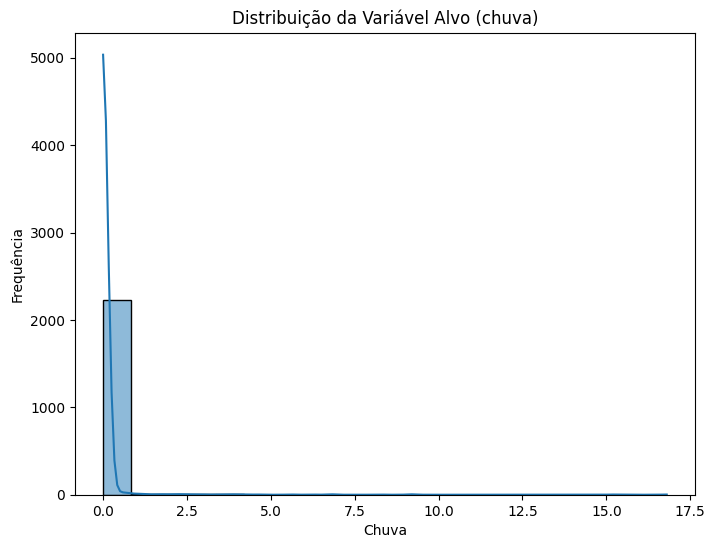

<ipython-input-30-21e6a329fa68>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_combined = data_combined.corr()


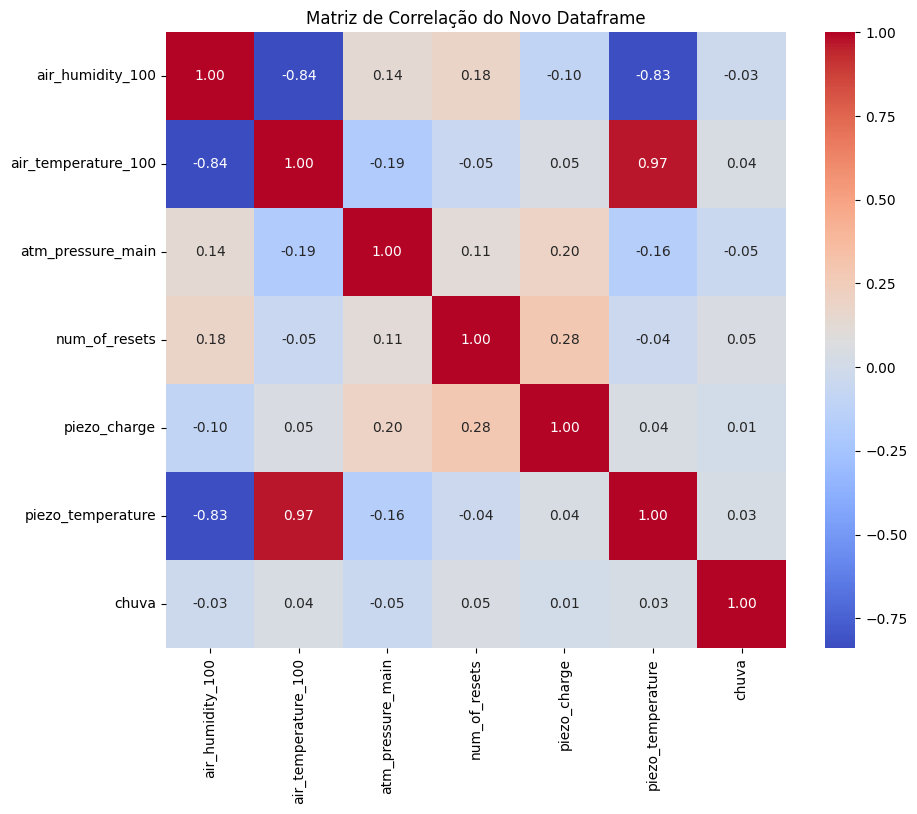

In [30]:
# Criando um novo dataframe combinando os dados do sensor e da estação meteorológica
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Visualizando as primeiras linhas do novo dataframe
print(data_combined.head())

# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas Descritivas do Novo Dataframe:")
print(data_combined.describe())

# Visualização da distribuição da variável alvo (chuva)
plt.figure(figsize=(8, 6))
sns.histplot(data_combined['chuva'], bins=20, kde=True)
plt.title('Distribuição da Variável Alvo (chuva)')
plt.xlabel('Chuva')
plt.ylabel('Frequência')
plt.show()

# Correlações entre as variáveis do novo dataframe
correlation_matrix_combined = data_combined.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação do Novo Dataframe')
plt.show()

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Padronizando as variáveis numéricas
scaler = StandardScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Visualizando as primeiras linhas do dataframe pré-processado
print(data_selected.head())

# Verificando as estatísticas descritivas após a padronização
print("\nEstatísticas Descritivas após a Padronização:")
print(data_selected.describe())

   atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  chuva
0          -0.790201      -1.510376      0.204149           0.607934    0.0
1          -0.790201      -1.510376      0.196631           0.727384    0.0
2          -0.524755      -1.510376      0.188805           0.727384    0.0
3          -0.524755      -1.510376      0.181287           0.727384    0.0
4          -0.638518      -1.510376      0.173845           0.727384    0.0

Estatísticas Descritivas após a Padronização:
       atm_pressure_main  num_of_resets  piezo_charge  piezo_temperature  \
count       1.711000e+03   1.711000e+03  1.711000e+03       1.711000e+03   
mean       -8.097945e-15   1.328893e-16  2.242508e-16       2.076396e-17   
std         1.000292e+00   1.000292e+00  1.000292e+00       1.000292e+00   
min        -3.141303e+00  -1.510376e+00 -1.957280e+00      -1.661624e+00   
25%        -6.385176e-01  -5.929982e-01 -8.011115e-01      -8.254715e-01   
50%         6.139166e-03   3.243797e-01 -

<ipython-input-31-092ba38ffded>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregando os dados do arquivo Sensor_FieldPRO.csv
sensor_data = pd.read_csv('Sensor_FieldPRO.csv')

# Carregando os dados do arquivo Estacao_Convencional.csv
estacao_data = pd.read_csv('Estacao_Convencional.csv')

# Combinando os dataframes
data_combined = pd.concat([sensor_data, estacao_data], axis=1)

# Selecionando as variáveis relevantes para a modelagem
relevant_features = ['atm_pressure_main', 'num_of_resets', 'piezo_charge', 'piezo_temperature']
target_variable = 'chuva'

data_selected = data_combined[relevant_features + [target_variable]]

# Padronizando as variáveis numéricas
scaler = StandardScaler()
data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])

# Separando os dados em conjunto de treinamento e teste
X = data_selected[relevant_features]
y = data_selected[target_variable]

# Definindo a proporção de dados para o conjunto de teste (por exemplo, 20%)
test_size = 0.2

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Visualizando as dimensões dos conjuntos de treinamento e teste
print("Dimensões do Conjunto de Treinamento:")
print(X_train.shape, y_train.shape)

print("\nDimensões do Conjunto de Teste:")
print(X_test.shape, y_test.shape)

Dimensões do Conjunto de Treinamento:
(1804, 4) (1804,)

Dimensões do Conjunto de Teste:
(452, 4) (452,)


<ipython-input-32-c976206191b5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[relevant_features] = scaler.fit_transform(data_selected[relevant_features])


In [33]:
print("Dados ausentes em X_train:")
print(X_train.isnull().sum())

print("Dados ausentes em X_test:")
print(X_test.isnull().sum())

Dados ausentes em X_train:
atm_pressure_main    436
num_of_resets        436
piezo_charge         436
piezo_temperature    436
dtype: int64
Dados ausentes em X_test:
atm_pressure_main    109
num_of_resets        109
piezo_charge         109
piezo_temperature    109
dtype: int64


In [34]:
# Preenchendo valores ausentes com a média da coluna
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [35]:
# Removendo colunas com valores ausentes (axis=1)
X_train.dropna(axis=1, inplace=True)
X_test.dropna(axis=1, inplace=True)

# Removendo linhas com valores ausentes (axis=0)
X_train.dropna(axis=0, inplace=True)
X_test.dropna(axis=0, inplace=True)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse}")
print(f"R² (Coefficient of Determination): {r2}")


MSE (Mean Squared Error): 0.25849488604805815
R² (Coefficient of Determination): 0.000941355128066812


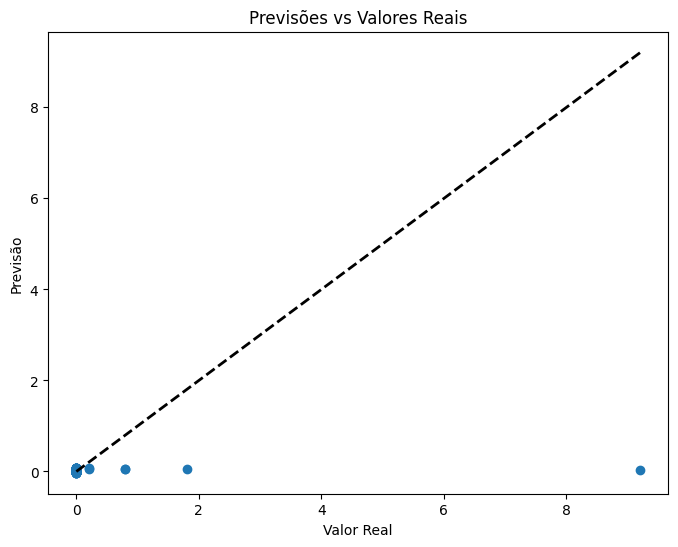

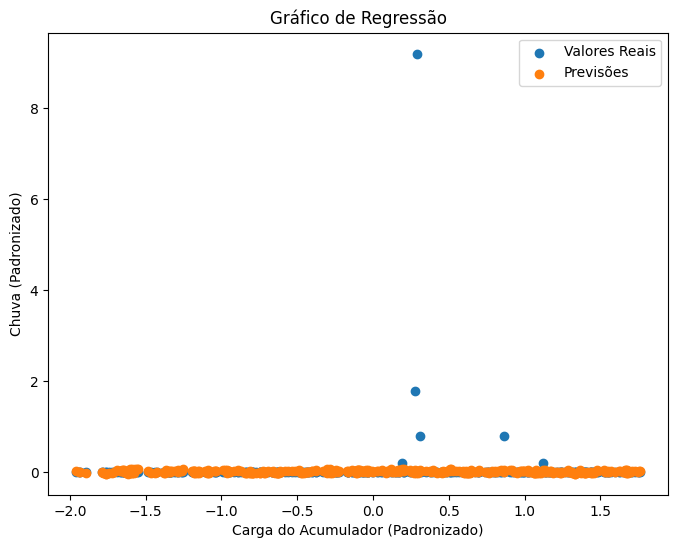

In [47]:
import matplotlib.pyplot as plt

# Visualizando as previsões em comparação com os valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.title('Previsões vs Valores Reais')
plt.show()

# Gráfico de regressão
plt.figure(figsize=(8, 6))
plt.scatter(X_test['piezo_charge'], y_test, label='Valores Reais')
plt.scatter(X_test['piezo_charge'], y_pred, label='Previsões')
plt.xlabel('Carga do Acumulador (Padronizado)')
plt.ylabel('Chuva (Padronizado)')
plt.title('Gráfico de Regressão')
plt.legend()
plt.show()


In [51]:
from sklearn.model_selection import cross_val_predict, KFold

# Criando um objeto KFold para a validação cruzada com 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizando a validação cruzada e obtendo as previsões
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=kfold)

# Avaliando o desempenho do modelo com a validação cruzada
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

print(f"MSE (Mean Squared Error) com Validação Cruzada: {mse_cv}")
print(f"R² (Coefficient of Determination) com Validação Cruzada: {r2_cv}")


MSE (Mean Squared Error) com Validação Cruzada: 0.05630293301630215
R² (Coefficient of Determination) com Validação Cruzada: -0.0024563205280891953


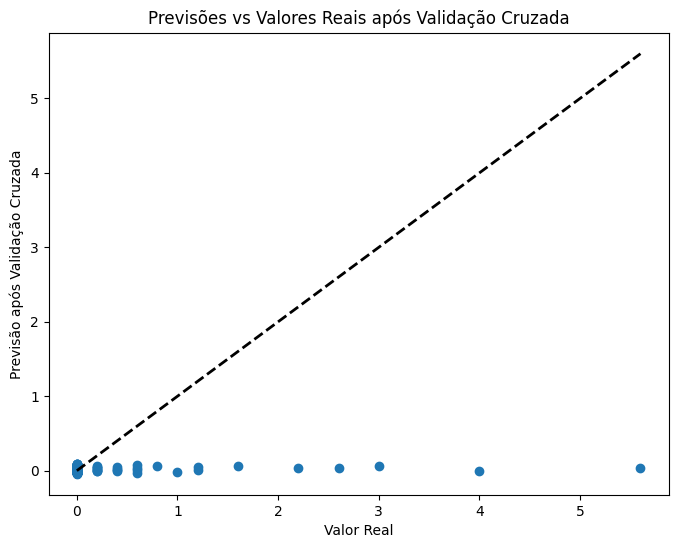

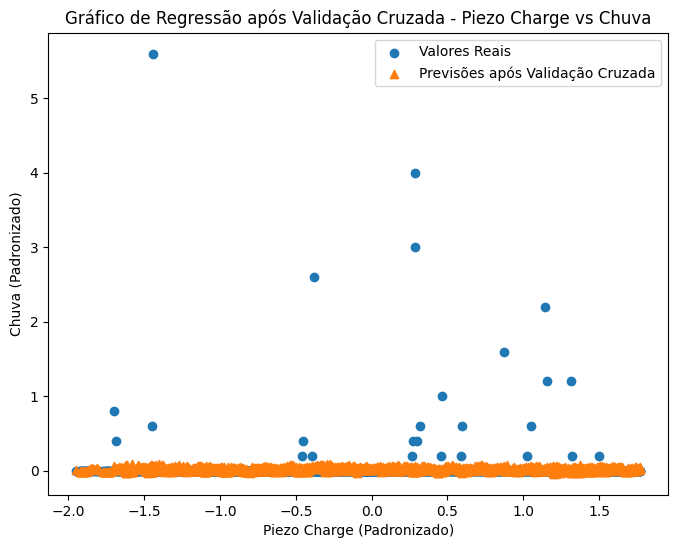

In [52]:
# Gráfico de Dispersão após a validação cruzada
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_cv)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsão após Validação Cruzada')
plt.title('Previsões vs Valores Reais após Validação Cruzada')
plt.show()

# Gráfico de Regressão após a validação cruzada
plt.figure(figsize=(8, 6))
plt.scatter(X_train['piezo_charge'], y_train, label='Valores Reais')
plt.scatter(X_train['piezo_charge'], y_pred_cv, label='Previsões após Validação Cruzada', marker='^')
plt.xlabel('Piezo Charge (Padronizado)')
plt.ylabel('Chuva (Padronizado)')
plt.title('Gráfico de Regressão após Validação Cruzada - Piezo Charge vs Chuva')
plt.legend()
plt.show()


In [53]:
import joblib

# Salvar o modelo treinado em um arquivo
model_filename = 'modelo_regressao_linear.pkl'
joblib.dump(model, model_filename)

print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!
